## Name - Ashwini Nandan
## Batch - March - 2019
## Email - nandan.ashwini@gmail.com

## Business Problem:

***One of the global banks would like to understand what factors driving credit card spend are. The bank wants to use these insights to calculate credit limit. In order to solve the problem, the bank conducted survey of 5000 customers and collected data.
The objective of this case study is to understand what's driving the total spend (Primary Card + Secondary card). Given the factors, predict credit limit for the new applicants***


## Data Availability:

- Data for the case are available in xlsx format(Data Set.xlxs).
- The data have been provided for 5000 customers.
- Detailed data dictionary has been provided for understanding the data in the data.
- Data is encoded in the numerical format to reduce the size of the data however some of the variables are categorical. You can  find the details in the data dictionary


## Data Dictonary

For data dictonary follow the "Data Dictionary.xlxs"

### Machine learning work steps through python:

#### Import all useable library

In [1]:
# import relevant modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as sn
import scipy.stats as stats
from matplotlib.backends.backend_pdf import PdfPages
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices
%matplotlib inline

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Settings
pd.set_option('display.max_columns', None)
np.set_printoptions(threshold=np.nan)
np.set_printoptions(precision=3)
sns.set(style="darkgrid")
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

#### Load the Data set.

In [2]:
custdata_df = pd.read_excel("Data Set.xlsx", sheetname="customer_dbase")

In [3]:
custdata_df.sample(5)

,custid,region,townsize,gender,age,agecat,birthmonth,ed,edcat,jobcat,union,employ,empcat,retire,income,lninc,inccat,debtinc,creddebt,lncreddebt,othdebt,lnothdebt,default,jobsat,marital,spoused,spousedcat,reside,pets,pets_cats,pets_dogs,pets_birds,pets_reptiles,pets_small,pets_saltfish,pets_freshfish,homeown,hometype,address,addresscat,cars,carown,cartype,carvalue,carcatvalue,carbought,carbuy,commute,commutecat,commutetime,commutecar,commutemotorcycle,commutecarpool,commutebus,commuterail,commutepublic,commutebike,commutewalk,commutenonmotor,telecommute,reason,polview,polparty,polcontrib,vote,card,cardtype,cardbenefit,cardfee,cardtenure,cardtenurecat,card2,card2type,card2benefit,card2fee,card2tenure,card2tenurecat,cardspent,card2spent,active,bfast,tenure,churn,longmon,lnlongmon,longten,lnlongten,tollfree,tollmon,lntollmon,tollten,lntollten,equip,equipmon,lnequipmon,equipten,lnequipten,callcard,cardmon,lncardmon,cardten,lncardten,wireless,wiremon,lnwiremon,wireten,lnwireten,multline,voice,pager,internet,callid,callwait,forward,confer,ebill,owntv,hourstv,ownvcr,owndvd,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
394,8512-KZJXAA-A34,5,2.0,0,58,5,July,13,2,3,0,13,4,0,54,3.988984,3,16.4,1.186704,0.171180,7.669296,2.037225,0,4,0,-1,-1,1,7,0,0,0,0,0,0,7,1,1,25,4,3,1,0,28.0,2,0,1,1,1,23.0,1,0,1,1,0,0,0,0,0,0,9,5,0,0,1,3,3,2,0,18,5,2,2,1,0,14,4,226.22,62.82,1,3,43,0,9.10,2.208274,399.10,5.989212,1,37.25,3.617652,1616.55,7.388050,0,0.0,NaN,0.00,NaN,1,32.50,3.481240,1395.0,7.240650,0,0.0,NaN,0.00,NaN,1,0,0,0,1,1,1,1,0,1,18,1,1,1,0,1,1,0,0,1,0,0,0
218,8477-FURXBL-V98,1,1.0,0,47,4,March,15,3,3,1,8,3,0,45,3.806662,2,19.7,2.526525,0.926845,6.338475,1.846638,0,5,0,-1,-1,1,2,1,1,0,0,0,0,0,1,1,24,4,1,1,1,25.3,2,0,1,3,2,14.0,0,0,1,0,0,0,0,0,0,0,9,4,0,0,0,4,1,4,0,4,2,3,2,3,0,6,3,42.69,12.08,0,3,7,0,4.05,1.398717,27.50,3.314186,0,0.00,NaN,0.00,NaN,0,0.0,NaN,0.00,NaN,0,0.00,NaN,0.0,NaN,0,0.0,NaN,0.00,NaN,0,0,0,2,0,0,0,0,0,1,17,1,1,1,0,1,0,1,0,0,0,0,0
4015,0409-MMPGJY-ECA,1,1.0,1,60,5,January,12,2,5,1,27,5,0,79,4.369448,4,7.7,1.344343,0.295905,4.738657,1.555754,0,2,0,-1,-1,1,2,2,0,0,0,0,0,0,1,1,9,3,0,-1,-1,-1.0,-1,-1,1,2,1,15.0,0,1,0,1,0,0,0,0,0,0,9,6,1,0,1,1,1,2,0,19,5,4,2,2,0,11,4,1249.83,881.78,0,3,30,0,8.15,2.098018,271.55,5.604146,1,17.00,2.833213,555.60,6.320049,0,0.0,NaN,0.00,NaN,1,5.50,1.704748,155.0,5.043425,0,0.0,NaN,0.00,NaN,0,0,0,0,0,1,1,1,0,1,14,1,1,1,0,0,0,0,0,0,1,0,0
4407,9411-CNRRPX-2HW,3,2.0,0,56,5,July,17,4,1,0,16,5,0,219,5.389072,5,7.0,5.212200,1.651002,10.117800,2.314296,0,2,0,-1,-1,1,5,0,5,0,0,0,0,0,0,2,19,4,2,1,0,46.1,3,0,1,1,1,15.0,1,1,0,0,1,0,0,0,0,0,9,3,0,0,1,3,1,4,0,33,5,1,1,2,0,23,5,678.79,96.49,0,3,63,0,23.50,3.157000,1508.30,7.318738,0,0.00,NaN,0.00,NaN,1,38.2,3.642836,2324.95,7.751454,1,38.50,3.650658,2400.0,7.783224,1,23.7,3.165475,1406.55,7.248895,1,0,1,1,1,1,1,1,1,1,12,1,1,1,0,1,0,1,1,0,0,0,1
1044,1890-WDOXSL-5H1,2,3.0,0,20,2,May,10,1,6,1,3,2,0,19,2.944439,1,3.0,0.369930,-0.994441,0.200070,-1.609088,0,2,1,11,1,4,0,0,0,0,0,0,0,0,0,2,0,1,2,1,0,9.6,1,0,1,1,1,19.0,1,0,1,0,0,0,0,0,0,0,9,5,0,0,0,3,3,3,0,2,2,4,3,1,0,2,2,362.36,163.95,1,3,24,0,3.75,1.321756,69.50,4.241327,0,0.00,NaN,0.00,NaN,0,0.0,NaN,0.00,NaN,1,7.25,1.981001,175.0,5.164786,0,0.0,NaN,0.00,NaN,0,0,0,0,0,1,1,1,0,1,22,0,1,1,0,0,0,0,0,0,0,0,0


In [4]:
# Find column information in the dataframe.
custdata_df.columns

Index(['custid', 'region', 'townsize', 'gender', 'age', 'agecat', 'birthmonth',
       'ed', 'edcat', 'jobcat',
       ...
       'owncd', 'ownpda', 'ownpc', 'ownipod', 'owngame', 'ownfax', 'news',
       'response_01', 'response_02', 'response_03'],
      dtype='object', length=130)

### Creating Dependent Y column

In [5]:
#To create Y we need to sumup cardspent(first card spent amount) and card2spent(Second card spent amount)
custdata_df['totalspend'] = custdata_df['cardspent'] + custdata_df['card2spent']

In [6]:
custdata_df.head()

,custid,region,townsize,gender,age,agecat,birthmonth,ed,edcat,jobcat,union,employ,empcat,retire,income,lninc,inccat,debtinc,creddebt,lncreddebt,othdebt,lnothdebt,default,jobsat,marital,spoused,spousedcat,reside,pets,pets_cats,pets_dogs,pets_birds,pets_reptiles,pets_small,pets_saltfish,pets_freshfish,homeown,hometype,address,addresscat,cars,carown,cartype,carvalue,carcatvalue,carbought,carbuy,commute,commutecat,commutetime,commutecar,commutemotorcycle,commutecarpool,commutebus,commuterail,commutepublic,commutebike,commutewalk,commutenonmotor,telecommute,reason,polview,polparty,polcontrib,vote,card,cardtype,cardbenefit,cardfee,cardtenure,cardtenurecat,card2,card2type,card2benefit,card2fee,card2tenure,card2tenurecat,cardspent,card2spent,active,bfast,tenure,churn,longmon,lnlongmon,longten,lnlongten,tollfree,tollmon,lntollmon,tollten,lntollten,equip,equipmon,lnequipmon,equipten,lnequipten,callcard,cardmon,lncardmon,cardten,lncardten,wireless,wiremon,lnwiremon,wireten,lnwireten,multline,voice,pager,internet,callid,callwait,forward,confer,ebill,owntv,hourstv,ownvcr,owndvd,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03,totalspend
0,3964-QJWTRG-NPN,1,2.0,1,20,2,September,15,3,1,1,0,1,0,31,3.433987,2,11.1,1.200909,0.183079,2.240091,0.806516,1,1,0,-1,-1,3,0,0,0,0,0,0,0,0,0,2,0,1,2,1,0,14.3,1,0,0,8,4,22.0,0,1,1,0,0,0,0,1,0,0,9,6,1,0,1,3,1,1,0,2,2,5,3,1,0,3,2,81.66,67.80,0,3,5,1,6.50,1.871802,34.40,3.538057,1,29.0,3.367296,161.05,5.081715,1,29.50,3.384390,126.1,4.837075,1,14.25,2.656757,60.0,4.094345,0,0.00,NaN,0.00,NaN,1,1,1,0,0,1,1,1,0,1,13,1,1,0,0,0,1,1,0,0,0,1,0,149.46
1,0648-AIPJSP-UVM,5,5.0,0,22,2,May,17,4,2,0,0,1,0,15,2.708050,1,18.6,1.222020,0.200505,1.567980,0.449788,1,1,0,-1,-1,2,6,0,0,0,0,0,0,6,1,3,2,1,2,1,1,6.8,1,0,0,1,1,29.0,1,0,0,1,0,0,1,0,1,1,9,4,1,0,0,2,4,1,0,4,2,4,1,3,0,4,2,42.60,34.94,1,1,39,0,8.90,2.186051,330.60,5.800909,0,0.0,NaN,0.00,NaN,1,54.85,4.004602,1975.0,7.588324,1,16.00,2.772589,610.0,6.413459,1,45.65,3.821004,1683.55,7.428660,1,1,1,4,1,0,1,0,1,1,18,1,1,1,1,1,1,1,1,1,0,0,0,77.54
2,5195-TLUDJE-HVO,3,4.0,1,67,6,June,14,2,2,0,16,5,0,35,3.555348,2,9.9,0.928620,-0.074056,2.536380,0.930738,0,4,1,13,2,3,3,2,1,0,0,0,0,0,1,1,30,5,3,1,1,18.8,1,0,1,4,3,24.0,1,0,1,1,1,0,0,0,0,0,2,5,1,0,0,2,1,4,0,35,5,4,1,3,0,25,5,184.22,175.75,0,3,65,0,28.40,3.346389,1858.35,7.527444,0,0.0,NaN,0.00,NaN,0,0.00,NaN,0.0,NaN,1,23.00,3.135494,1410.0,7.251345,0,0.00,NaN,0.00,NaN,1,0,0,0,0,0,0,0,0,1,21,1,1,1,0,0,0,0,0,1,0,0,0,359.97
3,4459-VLPQUH-3OL,4,3.0,0,23,2,May,16,3,2,0,0,1,0,20,2.995732,1,5.7,0.022800,-3.780995,1.117200,0.110826,1,2,1,18,4,5,0,0,0,0,0,0,0,0,1,3,3,2,3,1,1,8.7,1,0,1,1,1,38.0,1,0,0,0,0,0,0,0,0,0,9,3,0,0,0,2,1,4,0,5,2,3,2,4,0,5,2,340.99,18.42,1,1,36,0,6.00,1.791759,199.45,5.295564,0,0.0,NaN,0.00,NaN,0,0.00,NaN,0.0,NaN,1,21.00,3.044522,685.0,6.529419,0,0.00,NaN,0.00,NaN,1,0,0,2,0,0,0,0,1,1,26,1,1,1,0,1,1,1,0,1,1,0,0,359.41
4,8158-SMTQFB-CNO,2,2.0,0,26,3,July,16,3,2,0,1,1,0,23,3.135494,1,1.7,0.214659,-1.538705,0.176341,-1.735336,0,1,1,13,2,4,0,0,0,0,0,0,0,0,0,2,3,2,1,0,1,10.6,1,0,1,6,3,32.0,0,0,0,0,0,1,0,1,0,0,9,4,0,0,0,4,2,1,0,8,3,1,3,2,0,9,3,255.10,252.73,1,3,21,0,3.05,1.115142,74.10,4.305416,1,16.5,2.803360,387.70,5.960232,0,0.00,NaN,0.0,NaN,1,17.25,2.847812,360.0,5.886104,1,19.05,2.947067,410.80,6.018106,0,1,0,3,1,1,1,1,0,1,27,1,1,1,0,1,0,1,0,0,0,1,0,507.83


In [7]:
# Now Run pandas profiling to see the data audit reports

import pandas_profiling
pandas_profiling.ProfileReport(custdata_df)

Number of variables,131
Number of observations,5000
Total Missing (%),0.2%
Total size in memory,5.0 MiB
Average record size in memory,1.0 KiB
Numeric,59
Categorical,1
Boolean,49
Date,0
Text (Unique),1
Rejected,21


### Drop Variables

In [7]:
#Drop cardspent(first card spent amount) and card2spent(Second card spent amount) because its not adding any value
#Also  we are droping "custid","birthmonth" bacuse cust id is unique and birth month is not adding any value

custdata_df.drop(["cardspent","card2spent","custid"],axis=1, inplace=True)

In [ ]:
#Item count need to drop promary and secondary Iem count

### Check linearlity of data:

1. Use scatter plot by using 'df.plot' or if you want a linear line you can use 'sns.lmplot' through seaborn.

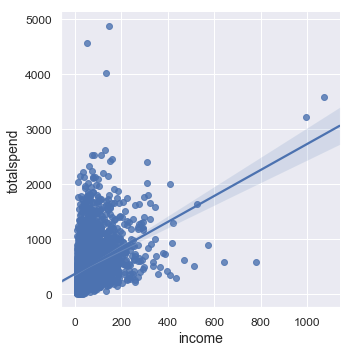

In [8]:
# Seaborn scatter plot with regression line
# aspect=1.5, scatter_kws={'alpha':0.2}) - You can choose this option too.
sns.lmplot(x='income', y='totalspend', data=custdata_df)

So we can see above most data points are near to line which means our data is normal and we can go ahed for further process.

In [9]:
# Creating Categorical List= Contains categorical variables...

for x in ['region','townsize','gender','agecat','edcat','birthmonth','jobcat','union','employ','empcat','retire',
          'inccat','default','jobsat','marital','spousedcat','homeown','hometype','address','addresscat','cars','carown',
          'cartype','carcatvalue','carbought','carbuy','commute','commutecat','commutecar',
          'commutemotorcycle','commutecarpool','commutebus','commuterail','commutepublic','commutebike','commutewalk',
         'commutenonmotor','telecommute','reason','polview','polparty','polcontrib','vote','card','cardtype','cardbenefit',
         'cardfee','cardtenure','cardtenurecat','card2','card2type','card2benefit','card2fee','card2tenure','card2tenurecat',
         'active','bfast','churn','tollfree','equip','callcard','wireless','multline','voice','pager','internet','callid',
         'callwait','forward','confer','ebill','owntv','ownvcr','owndvd','owncd','ownpda','ownpc','ownipod','owngame','ownfax',
        'news','response_01','response_02','response_03']:
    custdata_df[x]=custdata_df[x].astype('object')

### Separate numerical and categorical variable

To do that you need to apply for loop along with if condition.

In [10]:
# Find numerical variable in Data frame.
# This will return a list
numeric_var_names = [key for key in dict(custdata_df.dtypes) if dict(custdata_df.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]

# Find Categorical variable in Data frame
cat_var_names = [key for key in dict(custdata_df.dtypes) if dict(custdata_df.dtypes)[key] in ['object']]

#Print the data frame
print( numeric_var_names)
print(cat_var_names)

['age', 'ed', 'income', 'lninc', 'debtinc', 'creddebt', 'lncreddebt', 'othdebt', 'lnothdebt', 'spoused', 'reside', 'pets', 'pets_cats', 'pets_dogs', 'pets_birds', 'pets_reptiles', 'pets_small', 'pets_saltfish', 'pets_freshfish', 'carvalue', 'commutetime', 'tenure', 'longmon', 'lnlongmon', 'longten', 'lnlongten', 'tollmon', 'lntollmon', 'tollten', 'lntollten', 'equipmon', 'lnequipmon', 'equipten', 'lnequipten', 'cardmon', 'lncardmon', 'cardten', 'lncardten', 'wiremon', 'lnwiremon', 'wireten', 'lnwireten', 'hourstv', 'totalspend']
['region', 'townsize', 'gender', 'agecat', 'birthmonth', 'edcat', 'jobcat', 'union', 'employ', 'empcat', 'retire', 'inccat', 'default', 'jobsat', 'marital', 'spousedcat', 'homeown', 'hometype', 'address', 'addresscat', 'cars', 'carown', 'cartype', 'carcatvalue', 'carbought', 'carbuy', 'commute', 'commutecat', 'commutecar', 'commutemotorcycle', 'commutecarpool', 'commutebus', 'commuterail', 'commutepublic', 'commutebike', 'commutewalk', 'commutenonmotor', 'telec

In [11]:
#Convert a list in to dataframe 
#Information about numericvariable in custdata_df

custdata_df_num=custdata_df[numeric_var_names]
custdata_df_num.head(5)

,age,ed,income,lninc,debtinc,creddebt,lncreddebt,othdebt,lnothdebt,spoused,reside,pets,pets_cats,pets_dogs,pets_birds,pets_reptiles,pets_small,pets_saltfish,pets_freshfish,carvalue,commutetime,tenure,longmon,lnlongmon,longten,lnlongten,tollmon,lntollmon,tollten,lntollten,equipmon,lnequipmon,equipten,lnequipten,cardmon,lncardmon,cardten,lncardten,wiremon,lnwiremon,wireten,lnwireten,hourstv,totalspend
0,20,15,31,3.433987,11.1,1.200909,0.183079,2.240091,0.806516,-1,3,0,0,0,0,0,0,0,0,14.3,22.0,5,6.50,1.871802,34.40,3.538057,29.0,3.367296,161.05,5.081715,29.50,3.384390,126.1,4.837075,14.25,2.656757,60.0,4.094345,0.00,NaN,0.00,NaN,13,149.46
1,22,17,15,2.708050,18.6,1.222020,0.200505,1.567980,0.449788,-1,2,6,0,0,0,0,0,0,6,6.8,29.0,39,8.90,2.186051,330.60,5.800909,0.0,NaN,0.00,NaN,54.85,4.004602,1975.0,7.588324,16.00,2.772589,610.0,6.413459,45.65,3.821004,1683.55,7.428660,18,77.54
2,67,14,35,3.555348,9.9,0.928620,-0.074056,2.536380,0.930738,13,3,3,2,1,0,0,0,0,0,18.8,24.0,65,28.40,3.346389,1858.35,7.527444,0.0,NaN,0.00,NaN,0.00,NaN,0.0,NaN,23.00,3.135494,1410.0,7.251345,0.00,NaN,0.00,NaN,21,359.97
3,23,16,20,2.995732,5.7,0.022800,-3.780995,1.117200,0.110826,18,5,0,0,0,0,0,0,0,0,8.7,38.0,36,6.00,1.791759,199.45,5.295564,0.0,NaN,0.00,NaN,0.00,NaN,0.0,NaN,21.00,3.044522,685.0,6.529419,0.00,NaN,0.00,NaN,26,359.41
4,26,16,23,3.135494,1.7,0.214659,-1.538705,0.176341,-1.735336,13,4,0,0,0,0,0,0,0,0,10.6,32.0,21,3.05,1.115142,74.10,4.305416,16.5,2.803360,387.70,5.960232,0.00,NaN,0.0,NaN,17.25,2.847812,360.0,5.886104,19.05,2.947067,410.80,6.018106,27,507.83


In [12]:
#Convert a list in to dataframe 
#Information about categorical variable in custdata_df

custdata_df_cat=custdata_df[cat_var_names]
custdata_df_cat.head(5)

,region,townsize,gender,agecat,birthmonth,edcat,jobcat,union,employ,empcat,retire,inccat,default,jobsat,marital,spousedcat,homeown,hometype,address,addresscat,cars,carown,cartype,carcatvalue,carbought,carbuy,commute,commutecat,commutecar,commutemotorcycle,commutecarpool,commutebus,commuterail,commutepublic,commutebike,commutewalk,commutenonmotor,telecommute,reason,polview,polparty,polcontrib,vote,card,cardtype,cardbenefit,cardfee,cardtenure,cardtenurecat,card2,card2type,card2benefit,card2fee,card2tenure,card2tenurecat,active,bfast,churn,tollfree,equip,callcard,wireless,multline,voice,pager,internet,callid,callwait,forward,confer,ebill,owntv,ownvcr,owndvd,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
0,1,2,1,2,September,3,1,1,0,1,0,2,1,1,0,-1,0,2,0,1,2,1,0,1,0,0,8,4,0,1,1,0,0,0,0,1,0,0,9,6,1,0,1,3,1,1,0,2,2,5,3,1,0,3,2,0,3,1,1,1,1,0,1,1,1,0,0,1,1,1,0,1,1,1,0,0,0,1,1,0,0,0,1,0
1,5,5,0,2,May,4,2,0,0,1,0,1,1,1,0,-1,1,3,2,1,2,1,1,1,0,0,1,1,1,0,0,1,0,0,1,0,1,1,9,4,1,0,0,2,4,1,0,4,2,4,1,3,0,4,2,1,1,0,0,1,1,1,1,1,1,4,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,0,0,0
2,3,4,1,6,June,2,2,0,16,5,0,2,0,4,1,2,1,1,30,5,3,1,1,1,0,1,4,3,1,0,1,1,1,0,0,0,0,0,2,5,1,0,0,2,1,4,0,35,5,4,1,3,0,25,5,0,3,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,1,0,0,0
3,4,3,0,2,May,3,2,0,0,1,0,1,1,2,1,4,1,3,3,2,3,1,1,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,9,3,0,0,0,2,1,4,0,5,2,3,2,4,0,5,2,1,1,0,0,0,1,0,1,0,0,2,0,0,0,0,1,1,1,1,1,0,1,1,1,0,1,1,0,0
4,2,2,0,3,July,3,2,0,1,1,0,1,0,1,1,2,0,2,3,2,1,0,1,1,0,1,6,3,0,0,0,0,0,1,0,1,0,0,9,4,0,0,0,4,2,1,0,8,3,1,3,2,0,9,3,1,3,0,1,0,1,1,0,1,0,3,1,1,1,1,0,1,1,1,1,0,1,0,1,0,0,0,1,0


### Creating Data audit Report

In [13]:
# Use a general function that returns multiple values
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.dropna().quantile(0.01), x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

num_summary=custdata_df_num.apply(lambda x: var_summary(x)).T

In [14]:
num_summary

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
age,5000.0,0.0,2.351280e+05,47.025600,47.000000,17.770338,3.157849e+02,18.000000,18.000000,20.000000,23.000000,31.000000,47.000000,62.000000,72.000000,76.000000,79.000000,79.000000
ed,5000.0,0.0,7.271500e+04,14.543000,14.000000,3.281083,1.076550e+01,6.000000,8.000000,9.000000,10.000000,12.000000,14.000000,17.000000,19.000000,20.000000,21.000000,23.000000
income,5000.0,0.0,2.737980e+05,54.759600,38.000000,55.377511,3.066669e+03,9.000000,9.000000,13.000000,16.000000,24.000000,38.000000,67.000000,109.100000,147.000000,272.010000,1073.000000
lninc,5000.0,0.0,1.849955e+04,3.699909,3.637586,0.747072,5.581164e-01,2.197225,2.197225,2.564949,2.772589,3.178054,3.637586,4.204693,4.692261,4.990433,5.605839,6.978214
debtinc,5000.0,0.0,4.977080e+04,9.954160,8.800000,6.399783,4.095723e+01,0.000000,0.700000,1.900000,2.800000,5.100000,8.800000,13.600000,18.600000,22.200000,29.200000,43.100000
creddebt,5000.0,0.0,9.286628e+03,1.857326,0.926437,3.415732,1.166722e+01,0.000000,0.033160,0.101088,0.175682,0.385520,0.926437,2.063820,4.299470,6.373010,14.280358,109.072596
lncreddebt,4999.0,1.0,-6.521372e+02,-0.130454,-0.076106,1.273058,1.620678e+00,-6.597334,-3.401690,-2.291604,-1.737842,-0.952685,-0.076106,0.724665,1.458625,1.852297,2.658910,4.692014
othdebt,5000.0,0.0,1.827230e+04,3.654460,2.098540,5.395172,2.910788e+01,0.000000,0.114299,0.287692,0.457997,0.980301,2.098540,4.314780,8.062046,11.815981,24.064260,141.459150
lnothdebt,4999.0,1.0,3.483879e+03,0.696915,0.741537,1.128578,1.273689e+00,-4.092107,-2.168241,-1.243483,-0.780312,-0.018987,0.741537,1.462053,2.087178,2.469586,3.180802,4.952011
spoused,5000.0,0.0,3.056400e+04,6.112800,-1.000000,7.743518,5.996207e+01,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,14.000000,16.000000,18.000000,20.000000,24.000000


In [15]:
def cat_summary(x):
    return pd.Series([x.count(),x.isnull().sum(),x.value_counts(),x.unique()],
                    index=['N','NMISS','ColumnNames','UniqueValues'])

In [16]:
cat_summary=custdata_df_cat.apply(lambda x:cat_summary(x)).T

In [17]:
cat_summary

,N,NMISS,ColumnNames,UniqueValues
region,5000,0,5 1027 1 1009 3 1003 2 995 4 ...,"[1, 5, 3, 4, 2]"
townsize,4998,2,1.0 1436 2.0 1048 3.0 907 4.0 85...,"[2.0, 5.0, 4.0, 3.0, 1.0, nan]"
gender,5000,0,"1 2518 0 2482 Name: gender, dtype: int64","[1, 0]"
agecat,5000,0,4 1222 5 1195 6 1068 3 893 2 ...,"[2, 6, 3, 5, 4]"
birthmonth,5000,0,September 458 May 451 June ...,"[September, May, June, July, August, October, ..."
edcat,5000,0,2 1567 4 1111 3 1022 1 946 5 ...,"[3, 4, 2, 1, 5]"
jobcat,5000,0,2 1640 1 1388 6 688 3 620 5 ...,"[1, 2, 3, 6, 4, 5]"
union,5000,0,"0 4244 1 756 Name: union, dtype: int64","[1, 0]"
employ,5000,0,0 659 1 389 2 318 3 309 4 ...,"[0, 16, 1, 22, 10, 11, 15, 19, 8, 4, 12, 3, 27..."
empcat,5000,0,2 1180 5 1135 1 1048 3 968 4 ...,"[1, 5, 3, 4, 2]"


### Handling Outliers
#### There are some extreame high or extream low value which need to rectify so that it will not have impact on our model

In [18]:
#Handling Outliers for numerical data - Through function

def outlier_capping(x):
    x = x.clip_upper(x.quantile(0.99))
    x = x.clip_lower(x.quantile(0.01))
    return x

custdata_df_num = custdata_df_num.apply(lambda x: outlier_capping(x))

### Handling  Missing Values

#### As we can see in the above audit report some data is missing in nmerical data set and some are missing in categorical.
#### We will treat numerical missing data with mean() and categorical data with mode()

In [19]:
#Handling missings - by Function (Makethe function to treat all data in one shot)

def Missing_imputation(x):
    x = x.fillna(x.mean())
    return x

custdata_df_num = custdata_df_num.apply(lambda x: Missing_imputation(x))

In [20]:
#Handling missings - by Function (Makethe function to treat all data in one shot)

def Missing_imputation(x):
    x = x.fillna(x.mode())
    return x

custdata_df_cat = custdata_df_cat.apply(lambda x: Missing_imputation(x))

#### Again check missing values has been treated or not

In [21]:
# Find the total number of missing values in the numerical data i.e custdata_df_num
print ("\nMissing values in numerical data :  ", custdata_df_num.isnull().sum().values.sum())
print ("\nMissing values in categorical data :  ", custdata_df_num.isnull().sum().values.sum())


Missing values in numerical data :   0

Missing values in categorical data :   0


### Dummy creation for categorical data

In [22]:
# We need to create a function for dummy creation
def create_dummies(df, colname):
    col_dummies = pd.get_dummies(df[colname], prefix = colname)
    col_dummies.drop(col_dummies.columns[0], axis = 1, inplace = True)
    df = pd.concat([df, col_dummies], axis = 1)
    df.drop(colname, axis = 1, inplace = True)
    return df

In [23]:
custdata_df_cat=custdata_df.select_dtypes(include=['object'])
cat_varlist=list(custdata_df_cat.columns)

In [24]:
# For customer_features in categorical features

for c_feature in cat_varlist:
    custdata_df_cat[c_feature]=custdata_df_cat[c_feature].astype('category')
    custdata_df_cat=create_dummies(custdata_df_cat,c_feature)

In [25]:
custdata_df_cat.sample(5)

,region_2,region_3,region_4,region_5,townsize_2.0,townsize_3.0,townsize_4.0,townsize_5.0,gender_1,agecat_3,agecat_4,agecat_5,agecat_6,birthmonth_August,birthmonth_December,birthmonth_February,birthmonth_January,birthmonth_July,birthmonth_June,birthmonth_March,birthmonth_May,birthmonth_November,birthmonth_October,birthmonth_September,edcat_2,edcat_3,edcat_4,edcat_5,jobcat_2,jobcat_3,jobcat_4,jobcat_5,jobcat_6,union_1,employ_1,employ_2,employ_3,employ_4,employ_5,employ_6,employ_7,employ_8,employ_9,employ_10,employ_11,employ_12,employ_13,employ_14,employ_15,employ_16,employ_17,employ_18,employ_19,employ_20,employ_21,employ_22,employ_23,employ_24,employ_25,employ_26,employ_27,employ_28,employ_29,employ_30,employ_31,employ_32,employ_33,employ_34,employ_35,employ_36,employ_37,employ_38,employ_39,employ_40,employ_41,employ_42,employ_43,employ_44,employ_45,employ_46,employ_47,employ_48,employ_49,employ_51,employ_52,empcat_2,empcat_3,empcat_4,empcat_5,retire_1,inccat_2,inccat_3,inccat_4,inccat_5,default_1,jobsat_2,jobsat_3,jobsat_4,jobsat_5,marital_1,spousedcat_1,spousedcat_2,spousedcat_3,spousedcat_4,spousedcat_5,homeown_1,hometype_2,hometype_3,hometype_4,address_1,address_2,address_3,address_4,address_5,address_6,address_7,address_8,address_9,address_10,address_11,address_12,address_13,address_14,address_15,address_16,address_17,address_18,address_19,address_20,address_21,address_22,address_23,address_24,address_25,address_26,address_27,address_28,address_29,address_30,address_31,address_32,address_33,address_34,address_35,address_36,address_37,address_38,address_39,address_40,address_41,address_42,address_43,address_44,address_45,address_46,address_47,address_48,address_49,address_50,address_51,address_52,address_53,address_54,address_55,address_57,addresscat_2,addresscat_3,addresscat_4,addresscat_5,cars_1,cars_2,cars_3,cars_4,cars_5,cars_6,cars_7,cars_8,carown_0,carown_1,cartype_0,cartype_1,carcatvalue_1,carcatvalue_2,carcatvalue_3,carbought_0,carbought_1,carbuy_1,commute_2,commute_3,commute_4,commute_5,commute_6,commute_7,commute_8,commute_9,commute_10,commutecat_2,commutecat_3,commutecat_4,commutecat_5,commutecar_1,commutemotorcycle_1,commutecarpool_1,commutebus_1,commuterail_1,commutepublic_1,commutebike_1,commutewalk_1,commutenonmotor_1,telecommute_1,reason_2,reason_3,reason_4,reason_9,polview_2,polview_3,polview_4,polview_5,polview_6,polview_7,polparty_1,polcontrib_1,vote_1,card_2,card_3,card_4,card_5,cardtype_2,cardtype_3,cardtype_4,cardbenefit_2,cardbenefit_3,cardbenefit_4,cardfee_1,cardtenure_1,cardtenure_2,cardtenure_3,cardtenure_4,cardtenure_5,cardtenure_6,cardtenure_7,cardtenure_8,cardtenure_9,cardtenure_10,cardtenure_11,cardtenure_12,cardtenure_13,cardtenure_14,cardtenure_15,cardtenure_16,cardtenure_17,cardtenure_18,cardtenure_19,cardtenure_20,cardtenure_21,cardtenure_22,cardtenure_23,cardtenure_24,cardtenure_25,cardtenure_26,cardtenure_27,cardtenure_28,cardtenure_29,cardtenure_30,cardtenure_31,cardtenure_32,cardtenure_33,cardtenure_34,cardtenure_35,cardtenure_36,cardtenure_37,cardtenure_38,cardtenure_39,cardtenure_40,cardtenurecat_2,cardtenurecat_3,cardtenurecat_4,cardtenurecat_5,card2_2,card2_3,card2_4,card2_5,card2type_2,card2type_3,card2type_4,card2benefit_2,card2benefit_3,card2benefit_4,card2fee_1,card2tenure_1,card2tenure_2,card2tenure_3,card2tenure_4,card2tenure_5,card2tenure_6,card2tenure_7,card2tenure_8,card2tenure_9,card2tenure_10,card2tenure_11,card2tenure_12,card2tenure_13,card2tenure_14,card2tenure_15,card2tenure_16,card2tenure_17,card2tenure_18,card2tenure_19,card2tenure_20,card2tenure_21,card2tenure_22,card2tenure_23,card2tenure_24,card2tenure_25,card2tenure_26,card2tenure_27,card2tenure_28,card2tenure_29,card2tenure_30,card2tenurecat_2,card2tenurecat_3,card2tenurecat_4,card2tenurecat_5,active_1,bfast_2,bfast_3,churn_1,tollfree_1,equip_1,callcard_1,wireless_1,multline_1,voice_1,pager_1,internet_1,internet_2,internet_3,internet_4,callid_1,callwait_1,forward_1,confer_1,ebill_1,owntv_1,ownvcr_1,owndvd_1,ownc

### Merge Numerical and categorical data

***Now we have nice simple clean data for numerical and categorical both data frame, so now we can merge both data set***

In [26]:
custdata_df_new = pd.concat([custdata_df_num, custdata_df_cat], axis=1)

In [27]:
custdata_df_new.head()

,age,ed,income,lninc,debtinc,creddebt,lncreddebt,othdebt,lnothdebt,spoused,reside,pets,pets_cats,pets_dogs,pets_birds,pets_reptiles,pets_small,pets_saltfish,pets_freshfish,carvalue,commutetime,tenure,longmon,lnlongmon,longten,lnlongten,tollmon,lntollmon,tollten,lntollten,equipmon,lnequipmon,equipten,lnequipten,cardmon,lncardmon,cardten,lncardten,wiremon,lnwiremon,wireten,lnwireten,hourstv,totalspend,region_2,region_3,region_4,region_5,townsize_2.0,townsize_3.0,townsize_4.0,townsize_5.0,gender_1,agecat_3,agecat_4,agecat_5,agecat_6,birthmonth_August,birthmonth_December,birthmonth_February,birthmonth_January,birthmonth_July,birthmonth_June,birthmonth_March,birthmonth_May,birthmonth_November,birthmonth_October,birthmonth_September,edcat_2,edcat_3,edcat_4,edcat_5,jobcat_2,jobcat_3,jobcat_4,jobcat_5,jobcat_6,union_1,employ_1,employ_2,employ_3,employ_4,employ_5,employ_6,employ_7,employ_8,employ_9,employ_10,employ_11,employ_12,employ_13,employ_14,employ_15,employ_16,employ_17,employ_18,employ_19,employ_20,employ_21,employ_22,employ_23,employ_24,employ_25,employ_26,employ_27,employ_28,employ_29,employ_30,employ_31,employ_32,employ_33,employ_34,employ_35,employ_36,employ_37,employ_38,employ_39,employ_40,employ_41,employ_42,employ_43,employ_44,employ_45,employ_46,employ_47,employ_48,employ_49,employ_51,employ_52,empcat_2,empcat_3,empcat_4,empcat_5,retire_1,inccat_2,inccat_3,inccat_4,inccat_5,default_1,jobsat_2,jobsat_3,jobsat_4,jobsat_5,marital_1,spousedcat_1,spousedcat_2,spousedcat_3,spousedcat_4,spousedcat_5,homeown_1,hometype_2,hometype_3,hometype_4,address_1,address_2,address_3,address_4,address_5,address_6,address_7,address_8,address_9,address_10,address_11,address_12,address_13,address_14,address_15,address_16,address_17,address_18,address_19,address_20,address_21,address_22,address_23,address_24,address_25,address_26,address_27,address_28,address_29,address_30,address_31,address_32,address_33,address_34,address_35,address_36,address_37,address_38,address_39,address_40,address_41,address_42,address_43,address_44,address_45,address_46,address_47,address_48,address_49,address_50,address_51,address_52,address_53,address_54,address_55,address_57,addresscat_2,addresscat_3,addresscat_4,addresscat_5,cars_1,cars_2,cars_3,cars_4,cars_5,cars_6,cars_7,cars_8,carown_0,carown_1,cartype_0,cartype_1,carcatvalue_1,carcatvalue_2,carcatvalue_3,carbought_0,carbought_1,carbuy_1,commute_2,commute_3,commute_4,commute_5,commute_6,commute_7,commute_8,commute_9,commute_10,commutecat_2,commutecat_3,commutecat_4,commutecat_5,commutecar_1,commutemotorcycle_1,commutecarpool_1,commutebus_1,commuterail_1,commutepublic_1,commutebike_1,commutewalk_1,commutenonmotor_1,telecommute_1,reason_2,reason_3,reason_4,reason_9,polview_2,polview_3,polview_4,polview_5,polview_6,polview_7,polparty_1,polcontrib_1,vote_1,card_2,card_3,card_4,card_5,cardtype_2,cardtype_3,cardtype_4,cardbenefit_2,cardbenefit_3,cardbenefit_4,cardfee_1,cardtenure_1,cardtenure_2,cardtenure_3,cardtenure_4,cardtenure_5,cardtenure_6,cardtenure_7,cardtenure_8,cardtenure_9,cardtenure_10,cardtenure_11,cardtenure_12,cardtenure_13,cardtenure_14,cardtenure_15,cardtenure_16,cardtenure_17,cardtenure_18,cardtenure_19,cardtenure_20,cardtenure_21,cardtenure_22,cardtenure_23,cardtenure_24,cardtenure_25,cardtenure_26,cardtenure_27,cardtenure_28,cardtenure_29,cardtenure_30,cardtenure_31,cardtenure_32,cardtenure_33,cardtenure_34,cardtenure_35,cardtenure_36,cardtenure_37,cardtenure_38,cardtenure_39,cardtenure_40,cardtenurecat_2,cardtenurecat_3,cardtenurecat_4,cardtenurecat_5,card2_2,card2_3,card2_4,card2_5,card2type_2,card2type_3,card2type_4,card2benefit_2,card2benefit_3,card2benefit_4,card2fee_1,card2tenure_1,card2tenure_2,card2tenure_3,card2tenure_4,card2tenure_5,card2tenure_6,card2tenure_7,card2tenure_8,card2tenure_9,card2tenure_10,card2tenure_11,card2tenure_12,card2tenure_13,card2tenure_14,card2tenure_15,card2tenure_16,card2tenure_17,card2tenure_18,card2tenure_19,card2tenure_20,card2tenure_21,card2tenure_22,card2ten

In [27]:
# Some features has highly correlation with their log valuesso I am going to drop it.

#custdata_df_new.drop(['cardten', 'lninc','lncreddebt','lnothdebt','lnlongmon','lnlongten','lntollmon','lntollten',
#'lnequipmon','lnequipten','lncardten','lnwiremon','lnwireten'],axis=1, inplace=True)

In [28]:
custdata_df_new.shape

(5000, 400)

### Explore data and check the variable distribution

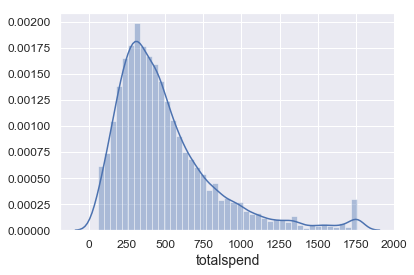

In [29]:
# For Linear regressin y(totalspend) should follow normal istribution
import seaborn as sns
sns.distplot(custdata_df_new.totalspend)

**Now as you can see distribution is right skewed so we need to take log and then plot the graph.**

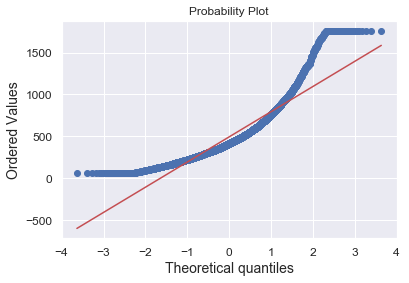

In [30]:
from scipy import stats
import pylab

stats.probplot(custdata_df_new.totalspend, dist="norm", plot=pylab )
pylab.show()

***As we can see above graph our data is not distributed normally perfectly, so we will use boxcox techniue to make it perfect normal***

In [31]:
from scipy import stats

# transform training data & save lambda value
custdata_df_new['bc_total_spend'],fitted_lambda = stats.boxcox(custdata_df_new['totalspend'])

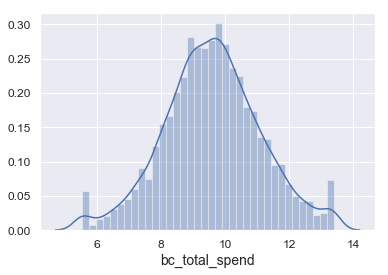

In [32]:
sns.distplot(custdata_df_new.bc_total_spend)

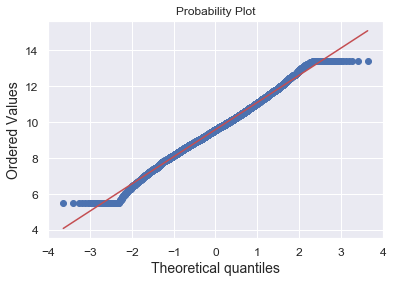

In [33]:
stats.probplot(custdata_df_new.bc_total_spend, dist="norm", plot=pylab )
pylab.show()

In [34]:
#Drop the y variables(totalspend) from dataframe because we are looking correlation between all x variables

custdata_df_new.drop(['totalspend'],axis=1,inplace=True)

### Devide data into train and test data 

In [35]:
#Splitting the data in all x variable and y variable.

feature_columns=custdata_df_new.columns.difference(['bc_total_spend'])

In [36]:
from sklearn.model_selection import train_test_split

train_x,test_x,train_y,test_y=train_test_split(custdata_df_new[feature_columns],
                                              custdata_df_new['bc_total_spend'],
                                              test_size=0.2,
                                              random_state=12)

In [37]:
print (len(train_x))
print (len(test_x))
print (len(train_y))
print (len(test_y))

4000
1000
4000
1000


### Feature selection by random forrest

In [38]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [39]:
RandomForestRegressor?

In [40]:
param_grid={'n_estimators':np.arange(10,25)}

tree=GridSearchCV(RandomForestRegressor(oob_score=False,warm_start=True),param_grid,cv=2)
tree.fit(train_x,train_y)  

GridSearchCV(cv=2, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=True),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [41]:
tree.best_params_

{'n_estimators': 23}

In [42]:
# we can take n_estimators': 23
radm_clf = RandomForestRegressor(oob_score=True,n_estimators=23)
radm_clf.fit( train_x, train_y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=23, n_jobs=1,
           oob_score=True, random_state=None, verbose=0, warm_start=False)

In [43]:
radm_clf.oob_score_

0.15767032576065787

In [44]:
from sklearn import metrics

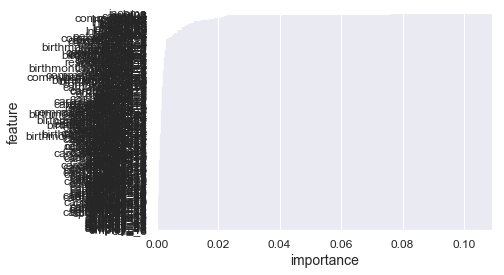

In [45]:
indices = np.argsort(radm_clf.feature_importances_)[::-1]
feature_rank = pd.DataFrame( columns = ['rank', 'feature', 'importance'] )
for f in range(train_x.shape[1]):
  feature_rank.loc[f] = [f+1,
                         train_x.columns[indices[f]],
                         radm_clf.feature_importances_[indices[f]]]
sns.barplot( y = 'feature', x = 'importance', data = feature_rank )

- As above graph is not clear so we will use below method.

In [46]:
indices = np.argsort(radm_clf.feature_importances_)[::-1]
feature_rank = pd.DataFrame( columns = ['rank', 'feature', 'importance'] )
for f in range(train_x.shape[1]):
  feature_rank.loc[f] = [f+1,
                         train_x.columns[indices[f]],
                         radm_clf.feature_importances_[indices[f]]]

feature_rank

,rank,feature,importance
0,1,income,1.037454e-01
1,2,lninc,7.589780e-02
2,3,card_3,2.596244e-02
3,4,card_2,2.239525e-02
4,5,carvalue,2.154065e-02
5,6,card_4,2.112358e-02
6,7,reason_2,2.094437e-02
7,8,debtinc,1.930640e-02
8,9,commutetime,1.846777e-02
9,10,hourstv,1.661541e-02


In [47]:
#Select features and then convert it into list
x=feature_rank.loc[0:75,['feature']]
x=x['feature'].tolist()
print(x)

['income', 'lninc', 'card_3', 'card_2', 'carvalue', 'card_4', 'reason_2', 'debtinc', 'commutetime', 'hourstv', 'age', 'lncreddebt', 'creddebt', 'othdebt', 'ed', 'lncardmon', 'tenure', 'lnothdebt', 'pets', 'lncardten', 'cardmon', 'lntollmon', 'longmon', 'card_5', 'spoused', 'cardten', 'lnlongten', 'lnequipten', 'lnlongmon', 'longten', 'card2_2', 'lntollten', 'lnequipmon', 'tollmon', 'card2_3', 'lnwiremon', 'gender_1', 'reside', 'tollten', 'pets_cats', 'pets_dogs', 'pets_freshfish', 'equipmon', 'commutewalk_1', 'polparty_1', 'lnwireten', 'polview_4', 'card2benefit_3', 'union_1', 'spousedcat_2', 'card2benefit_2', 'card2type_2', 'vote_1', 'carown_0', 'equipten', 'region_3', 'card2_4', 'carbought_1', 'carbuy_1', 'jobsat_4', 'birthmonth_October', 'active_1', 'townsize_3.0', 'cardbenefit_4', 'region_5', 'cartype_0', 'cardtype_2', 'cardtype_4', 'forward_1', 'commutebus_1', 'jobsat_3', 'commutecar_1', 'card2benefit_4', 'townsize_4.0', 'commuterail_1', 'wiremon']


In [48]:
# Create data frame with selected features
rf_features=['income', 'lninc', 'card_3', 'card_2', 'carvalue', 'card_4', 'commutetime', 'reason_2', 'debtinc', 'hourstv', 'creddebt', 'age', 'lncreddebt', 'tenure', 'lncardmon', 'lnothdebt', 'ed', 'othdebt', 'pets', 'lncardten', 'lntollmon', 'cardmon', 'longmon', 'card_5', 'lnlongmon', 'reside', 'spoused', 'cardten', 'lntollten', 'lnequipmon', 'lnlongten', 'tollten', 'longten', 'tollmon', 'lnwiremon', 'card2_2', 'card2_3', 'pets_freshfish', 'lnequipten', 'gender_1', 'pets_dogs', 'equipten', 'wireten', 'pets_cats', 'address_22', 'equipmon', 'wiremon', 'jobsat_4', 'commutebus_1', 'card2benefit_4']

rf_features.append('bc_total_spend')
df_rf= custdata_df_new[rf_features]

df_rf.head(5)


,income,lninc,card_3,card_2,carvalue,card_4,commutetime,reason_2,debtinc,hourstv,creddebt,age,lncreddebt,tenure,lncardmon,lnothdebt,ed,othdebt,pets,lncardten,lntollmon,cardmon,longmon,card_5,lnlongmon,reside,spoused,cardten,lntollten,lnequipmon,lnlongten,tollten,longten,tollmon,lnwiremon,card2_2,card2_3,pets_freshfish,lnequipten,gender_1,pets_dogs,equipten,wireten,pets_cats,address_22,equipmon,wiremon,jobsat_4,commutebus_1,card2benefit_4,bc_total_spend
0,31.0,3.433987,1,0,14.3,0,22.0,0,11.1,13.0,1.200909,20.0,0.183079,5.0,2.656757,0.806516,15.0,2.240091,0.0,4.094345,3.367296,14.25,6.50,0,1.871802,3.0,-1.0,60.0,5.081715,3.384390,3.538057,161.05,34.40,29.0,3.604226,0,0,0.0,4.837075,1,0.0,126.1,0.00,0.0,0,29.50,0.00,0,0,0,7.323447
1,15.0,2.708050,0,1,6.8,0,29.0,0,18.6,18.0,1.222020,22.0,0.200505,39.0,2.772589,0.449788,17.0,1.567980,6.0,6.413459,3.242727,16.00,8.90,0,2.186051,2.0,-1.0,610.0,6.585937,4.004602,5.800909,0.00,330.60,0.0,3.821004,0,0,6.0,7.588324,0,0.0,1975.0,1683.55,0.0,0,54.85,45.65,0,1,0,6.039640
2,35.0,3.555348,0,1,18.8,0,24.0,1,9.9,21.0,0.928620,67.0,-0.074056,65.0,3.135494,0.930738,14.0,2.536380,3.0,7.251345,3.242727,23.00,28.40,0,3.346389,3.0,13.0,1410.0,6.585937,3.599725,7.527444,0.00,1858.35,0.0,3.604226,0,0,0.0,6.747846,1,1.0,0.0,0.00,2.0,0,0.00,0.00,1,1,0,9.243615
3,20.0,2.995732,0,1,8.7,0,38.0,0,5.7,26.0,0.033160,23.0,-3.401690,36.0,3.044522,0.110826,16.0,1.117200,0.0,6.529419,3.242727,21.00,6.00,0,1.791759,5.0,18.0,685.0,6.585937,3.599725,5.295564,0.00,199.45,0.0,3.604226,0,1,0.0,6.747846,0,0.0,0.0,0.00,0.0,0,0.00,0.00,0,0,1,9.239995
4,23.0,3.135494,0,0,10.6,1,32.0,0,1.7,27.0,0.214659,26.0,-1.538705,21.0,2.847812,-1.735336,16.0,0.176341,0.0,5.886104,2.803360,17.25,3.05,0,1.115142,4.0,13.0,360.0,5.960232,3.599725,4.305416,387.70,74.10,16.5,2.947067,0,0,0.0,6.747846,0,0.0,0.0,410.80,0.0,0,0.00,19.05,0,0,0,10.063779


### Check - 2:  Find multicolinearlity

In [49]:
import statsmodels as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

In [50]:
del rf_features[-1]

In [51]:
%%capture
#gather features
features = "+".join(rf_features)

In [52]:
features

'income+lninc+card_3+card_2+carvalue+card_4+commutetime+reason_2+debtinc+hourstv+creddebt+age+lncreddebt+tenure+lncardmon+lnothdebt+ed+othdebt+pets+lncardten+lntollmon+cardmon+longmon+card_5+lnlongmon+reside+spoused+cardten+lntollten+lnequipmon+lnlongten+tollten+longten+tollmon+lnwiremon+card2_2+card2_3+pets_freshfish+lnequipten+gender_1+pets_dogs+equipten+wireten+pets_cats+address_22+equipmon+wiremon+jobsat_4+commutebus_1+card2benefit_4'

In [53]:
# get y and X dataframes based on this regression:
y, X = dmatrices('bc_total_spend~' + features,df_rf, return_type='dataframe')

In [54]:
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

In [55]:
vif.sort_values(by=['VIF Factor'],ascending=False)

,VIF Factor,features
0,1686.859676,Intercept
23,148.928795,longmon
33,117.386519,longten
25,33.762250,lnlongmon
31,31.415359,lnlongten
14,24.098226,tenure
32,21.097455,tollten
42,19.936232,equipten
34,15.002808,tollmon
46,14.944802,equipmon


In [56]:
#Select only those features whose Vif is greater than 10.
vif1=vif[vif['VIF Factor']>10].reset_index().loc[:,['features']]
vif1.drop([0],axis=0,inplace=True)
drop_vars= vif1["features"].tolist()
drop_vars

['tenure',
 'pets',
 'cardmon',
 'longmon',
 'lnlongmon',
 'cardten',
 'lnlongten',
 'tollten',
 'longten',
 'tollmon',
 'pets_freshfish',
 'equipten',
 'wireten',
 'equipmon',
 'wiremon']

In [57]:
# dropping variables that have VIF greater than 10
df_rf.drop(drop_vars,axis=1,inplace=True)

In [58]:
df_rf.shape

(5000, 36)

### Check 3 - All x variables should have a linear relationship with Y

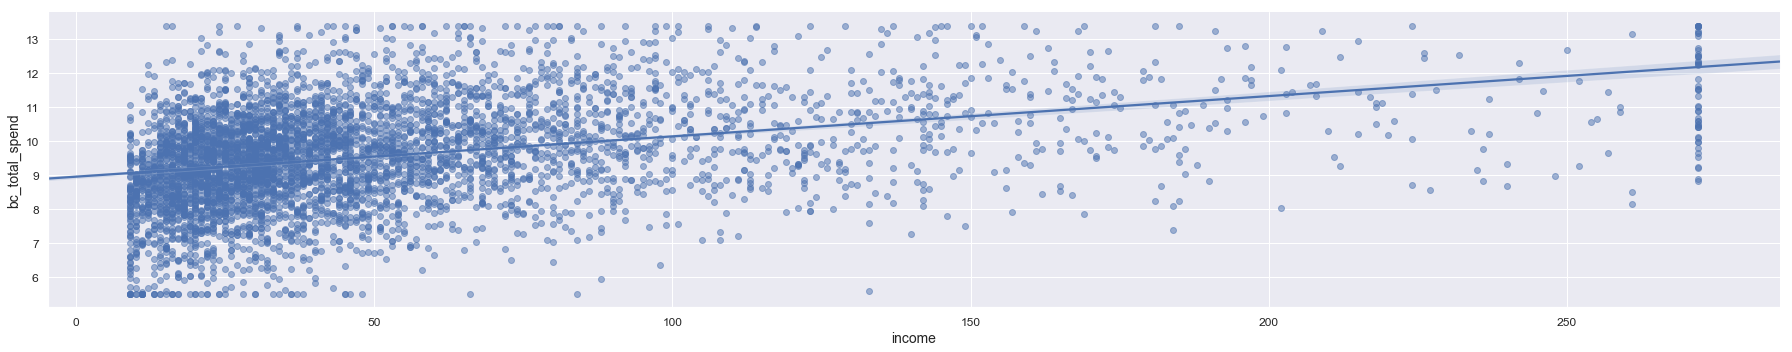

In [59]:
sns.lmplot(x="income",y="bc_total_spend",data=df_rf,aspect=5,scatter_kws={'alpha':0.5})

### Splitting data for training and testing

In [60]:
# Dropping variables one at a time which have p-values greater than 5%
feature_columns=df_rf.columns.difference(['bc_total_spend','address_22','pets_cats','lncardmon','lnequipten','spoused'
                                         ,'creddebt','reside','othdebt','debtinc','lnothdebt','jobsat_4','income','carvalue',
                                         'card2benefit_4','commutebus_1','hourstv','lnwiremon','pets_dogs','lncardten',
                                         'commutetime','lntollten','lntollmon','lnequipmon'])

In [61]:
train_x,test_x,train_y,test_y=train_test_split(df_rf[feature_columns],
                                              df_rf['bc_total_spend'],
                                               test_size=.2,
                                               random_state=123)

### Build Regression model using statsmodels.api

In [62]:
import statsmodels.api as sm

In [63]:
train_x = sm.add_constant(train_x)
test_x=sm.add_constant(test_x)
lm=sm.OLS(train_y,train_x).fit()

In [64]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:         bc_total_spend   R-squared:                       0.325
Model:                            OLS   Adj. R-squared:                  0.323
Method:                 Least Squares   F-statistic:                     159.7
Date:                Tue, 01 Oct 2019   Prob (F-statistic):               0.00
Time:                        22:46:22   Log-Likelihood:                -6598.7
No. Observations:                4000   AIC:                         1.322e+04
Df Residuals:                    3987   BIC:                         1.331e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.2401      0.172     47.920      0.0

In [65]:
lm.pvalues.sort_values(ascending=False)

lncreddebt     4.587652e-02
ed             1.887734e-02
age            2.357317e-04
gender_1       2.078595e-04
card2_3        1.303811e-11
card2_2        2.408523e-13
reason_2       3.210677e-18
card_5         4.947423e-20
card_3         1.090371e-80
card_2         3.707595e-81
card_4         3.890897e-93
lninc         2.235272e-115
const          0.000000e+00
dtype: float64

In [66]:
print('Parameters:', lm.params) # Find the parameters of x i.e Beta value
print('R2: ', lm.rsquared) # Find the r**2

Parameters: const         8.240115
age          -0.004194
card2_2      -0.379415
card2_3      -0.345223
card_2       -1.243274
card_3       -1.239082
card_4       -1.269314
card_5       -0.992801
ed           -0.015444
gender_1     -0.148872
lncreddebt    0.039624
lninc         0.809044
reason_2      0.707096
dtype: float64
R2:  0.3246950341215388


### Eveluation of model accuracy

In [67]:
test_pred=lm.predict(test_x)
train_pred=lm.predict(train_x)

from sklearn import metrics

print('MSE Test:',metrics.mean_squared_error(test_y,test_pred))
print('MSE Train:',metrics.mean_squared_error(train_y,train_pred))

MSE Test: 1.5275403610908898
MSE Train: 1.5864409028377782


In [68]:
print ('MAE:', metrics.mean_absolute_error(test_y, test_pred))
print ('MSE:', metrics.mean_squared_error(test_y, test_pred))
print ('RMSE:', np.sqrt(metrics.mean_squared_error(test_y, test_pred)))

MAE: 0.9762061585444958
MSE: 1.5275403610908898
RMSE: 1.2359370376725871


In [69]:
MAPE_train = '%.3f' % np.mean(np.abs(train_y-train_pred)/(train_y))
MAPE_test = '%.3f' % np.mean(np.abs(test_y-test_pred)/(test_y))

# print the values of MAPE for train and test
print('MAPE of training data: ', MAPE_train,  ' | ', 'MAPE of testing data: ', MAPE_test)

MAPE of training data:  0.110  |  MAPE of testing data:  0.106


### Check Normality and Residuals

***We will use Q-Q plot to examine this***

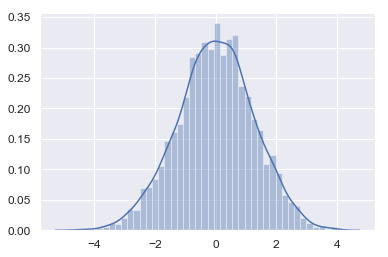

In [70]:
residuals=train_y-train_pred

import seaborn as sns

sns.distplot(residuals)

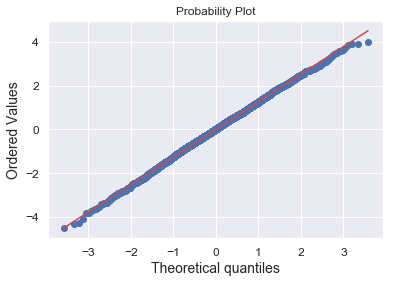

In [71]:
from scipy import stats
import pylab

stats.probplot(residuals,dist='norm',plot=pylab)
pylab.show()

***From the above histogram and Q-Q plot, shows that the residuals are normally distributed, so our  assumption is not violated***

### Predicting sales:

***We are going to credit card sales on Testing data***

In [73]:
df_rf=df_rf[feature_columns]

df_rf=sm.add_constant(df_rf)

df_rf.head()

,const,age,card2_2,card2_3,card_2,card_3,card_4,card_5,ed,gender_1,lncreddebt,lninc,reason_2
0,1.0,20.0,0,0,0,1,0,0,15.0,1,0.183079,3.433987,0
1,1.0,22.0,0,0,1,0,0,0,17.0,0,0.200505,2.708050,0
2,1.0,67.0,0,0,1,0,0,0,14.0,1,-0.074056,3.555348,1
3,1.0,23.0,0,1,1,0,0,0,16.0,0,-3.401690,2.995732,0
4,1.0,26.0,0,0,0,0,1,0,16.0,0,-1.538705,3.135494,0


In [75]:
# Final prediction on test file
from scipy.special import boxcox, inv_boxcox

pred_total_spend=inv_boxcox(lm.predict(df_rf),fitted_lambda)
pred_total_spend=pd.DataFrame(pred_total_spend.tolist())
pred_total_spend.columns = ['pred_total_spend']


#Concatenating final prediction with original test file
  
testfile = pd.concat([custdata_df, pred_total_spend], axis=1)

testfile.head()

,region,townsize,gender,age,agecat,birthmonth,ed,edcat,jobcat,union,employ,empcat,retire,income,lninc,inccat,debtinc,creddebt,lncreddebt,othdebt,lnothdebt,default,jobsat,marital,spoused,spousedcat,reside,pets,pets_cats,pets_dogs,pets_birds,pets_reptiles,pets_small,pets_saltfish,pets_freshfish,homeown,hometype,address,addresscat,cars,carown,cartype,carvalue,carcatvalue,carbought,carbuy,commute,commutecat,commutetime,commutecar,commutemotorcycle,commutecarpool,commutebus,commuterail,commutepublic,commutebike,commutewalk,commutenonmotor,telecommute,reason,polview,polparty,polcontrib,vote,card,cardtype,cardbenefit,cardfee,cardtenure,cardtenurecat,card2,card2type,card2benefit,card2fee,card2tenure,card2tenurecat,active,bfast,tenure,churn,longmon,lnlongmon,longten,lnlongten,tollfree,tollmon,lntollmon,tollten,lntollten,equip,equipmon,lnequipmon,equipten,lnequipten,callcard,cardmon,lncardmon,cardten,lncardten,wireless,wiremon,lnwiremon,wireten,lnwireten,multline,voice,pager,internet,callid,callwait,forward,confer,ebill,owntv,hourstv,ownvcr,owndvd,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03,totalspend,pred_total_spend
0,1,2,1,20,2,September,15,3,1,1,0,1,0,31,3.433987,2,11.1,1.200909,0.183079,2.240091,0.806516,1,1,0,-1,-1,3,0,0,0,0,0,0,0,0,0,2,0,1,2,1,0,14.3,1,0,0,8,4,22.0,0,1,1,0,0,0,0,1,0,0,9,6,1,0,1,3,1,1,0,2,2,5,3,1,0,3,2,0,3,5,1,6.50,1.871802,34.40,3.538057,1,29.0,3.367296,161.05,5.081715,1,29.50,3.384390,126.1,4.837075,1,14.25,2.656757,60.0,4.094345,0,0.00,NaN,0.00,NaN,1,1,1,0,0,1,1,1,0,1,13,1,1,0,0,0,1,1,0,0,0,1,0,149.46,372.303627
1,5,5,0,22,2,May,17,4,2,0,0,1,0,15,2.708050,1,18.6,1.222020,0.200505,1.567980,0.449788,1,1,0,-1,-1,2,6,0,0,0,0,0,0,6,1,3,2,1,2,1,1,6.8,1,0,0,1,1,29.0,1,0,0,1,0,0,1,0,1,1,9,4,1,0,0,2,4,1,0,4,2,4,1,3,0,4,2,1,1,39,0,8.90,2.186051,330.60,5.800909,0,0.0,NaN,0.00,NaN,1,54.85,4.004602,1975.0,7.588324,1,16.00,2.772589,610.0,6.413459,1,45.65,3.821004,1683.55,7.428660,1,1,1,4,1,0,1,0,1,1,18,1,1,1,1,1,1,1,1,1,0,0,0,77.54,302.061632
2,3,4,1,67,6,June,14,2,2,0,16,5,0,35,3.555348,2,9.9,0.928620,-0.074056,2.536380,0.930738,0,4,1,13,2,3,3,2,1,0,0,0,0,0,1,1,30,5,3,1,1,18.8,1,0,1,4,3,24.0,1,0,1,1,1,0,0,0,0,0,2,5,1,0,0,2,1,4,0,35,5,4,1,3,0,25,5,0,3,65,0,28.40,3.346389,1858.35,7.527444,0,0.0,NaN,0.00,NaN,0,0.00,NaN,0.0,NaN,1,23.00,3.135494,1410.0,7.251345,0,0.00,NaN,0.00,NaN,1,0,0,0,0,0,0,0,0,1,21,1,1,1,0,0,0,0,0,1,0,0,0,359.97,480.932947
3,4,3,0,23,2,May,16,3,2,0,0,1,0,20,2.995732,1,5.7,0.022800,-3.780995,1.117200,0.110826,1,2,1,18,4,5,0,0,0,0,0,0,0,0,1,3,3,2,3,1,1,8.7,1,0,1,1,1,38.0,1,0,0,0,0,0,0,0,0,0,9,3,0,0,0,2,1,4,0,5,2,3,2,4,0,5,2,1,1,36,0,6.00,1.791759,199.45,5.295564,0,0.0,NaN,0.00,NaN,0,0.00,NaN,0.0,NaN,1,21.00,3.044522,685.0,6.529419,0,0.00,NaN,0.00,NaN,1,0,0,2,0,0,0,0,1,1,26,1,1,1,0,1,1,1,0,1,1,0,0,359.41,271.020145
4,2,2,0,26,3,July,16,3,2,0,1,1,0,23,3.135494,1,1.7,0.214659,-1.538705,0.176341,-1.735336,0,1,1,13,2,4,0,0,0,0,0,0,0,0,0,2,3,2,1,0,1,10.6,1,0,1,6,3,32.0,0,0,0,0,0,1,0,1,0,0,9,4,0,0,0,4,2,1,0,8,3,1,3,2,0,9,3,1,3,21,0,3.05,1.115142,74.10,4.305416,1,16.5,2.803360,387.70,5.960232,0,0.00,NaN,0.0,NaN,1,17.25,2.847812,360.0,5.886104,1,19.05,2.947067,410.80,6.018106,0,1,0,3,1,1,1,1,0,1,27,1,1,1,0,1,0,1,0,0,0,1,0,507.83,336.914886


In [79]:
#Export the final result in csv.
%cd C:\\Users\\ashwini\\Desktop
testfile.to_csv('Final_submission_credit_spend.csv',index=False)

C:\Users\ashwini\Desktop
